# Data Science Project: Public
## Quantitative & Financial Data Analytics of Used Car Prices using Statistical Modeling & Predictive Machine Learning on IBM Cloud

## Overview
* Author: Patrick Dolloso
* Date: Dec 1 2018
* Email: patrick.dolloso@gmail.com
* Source code:   

### Details: 
This is a full-scale Quantitative/Financial Data Analytics Project of Used Car Prices using Statistical Modeling & Predictive Machine Learning using IBM Cloud JupyterLabs as part of the IBM Certification: Data Analysis with Python. This is in fulfilment of the Data Science Foundations Specialization

![](https://github.com/patrickdolloso/IBM-Data-Analysis-Python/blob/master/Projects/data-analysis-with-python.png?raw=true)  
![](https://github.com/patrickdolloso/IBM-Data-Analysis-Python/blob/master/Projects/data-science-foundations-specialist.png?raw=true)

## Table of Contents
1. Data Mining
2. Data Wrangling/Cleaning
3. Data Cleaning - Missing data
4. Data Analysis, Statistical/Quantitative Analysis
5. Data Visualization, Prefictive Analytics
6. Statistical Model Verification
7. Machine Learning Model Developement
8. Conclusion

## 1. Data Mining
### About the Data

![](https://archive.ics.uci.edu/ml/assets/logo.gif)

"The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. The archive was created as an ftp archive in 1987 by David Aha and fellow graduate students at UC Irvine. Since that time, it has been widely used by students, educators, and researchers all over the world as a primary source of machine learning data sets. As an indication of the impact of the archive, it has been cited over 1000 times, making it one of the top 100 most cited "papers" in all of computer science. The current version of the web site was designed in 2007 by Arthur Asuncion and David Newman, and this project is in collaboration with Rexa.info at the University of Massachusetts Amherst. Funding support from the National Science Foundation is gratefully acknowledged." [Link to site](https://archive.ics.uci.edu/ml/datasets/Automobile)

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [1]:
# import pandas library
import pandas as pd

# import dataset into dataframe
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header=None)

# print "done" when complete
done = "Done!"
done

'Done!'

In [2]:
# check if dataset is correctly uploaded
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# check bottom rows
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 2. Data Wrangling/Cleaning

### 2.1. Adding headers
* As pandas automatically assigns numeric headers, to better describe our data, we can introduce headers as available at: https://archive.ics.uci.edu/ml/datasets/Automobile
* we add headers manually below:

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# replace headers and recheck data frame:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### 2.2. Data Cleaning
* As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
* This process involves data conversion and cleaning to a format that may be better used for analysis if needed.
* First determine the datatypes of the various columns to determine if the data structures fit each dataset

In [5]:
# find the names of the columns and datatypes of the dataframe to analyze
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### 2.3 Convert "?" to NaN
* In the car dataset, missing data comes with the question mark "?".
* We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience.

In [6]:
# import NumPy library
import numpy as np

# replace "?" to NaN using NumPy function .replace()
df.replace("?", np.nan, inplace=True)

# check if properly implemented
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2.4 Boolean null-check
* Next, create a boolean null-checking object using
```.isnull()``` and ```.notnull()``` functions in python
* The output is a boolean value indicating whether the dataframe is missing data

In [7]:
# assign null value checker to variable
missing_data = df.isnull()

# check first few values
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2.5 NaN value count
* Using a For-loop in Python and the boolean number checker, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset. 
* ```.value_couts()``` function counts the number of "True" values.

In [8]:
# for-loop, find nulls in each column and count
for column in missing_data.columns.values.tolist():
    print(column) # prints column name
    print(missing_data[column].value_counts()) # prints boolean counts
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

As we can see, the following missing data (NaN) as denoted by ```True``` counts are as follows:
1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

### 3. Data Cleaning - Missing data
#### There are ways to deal with missing data:
1. Drop data 
        a. drop the whole row
        b. drop the whole column
2. Replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. 

In our dataset, none of the columns are empty enough to drop entirely.

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean
    
**Replace by frequency:**

    "num-of-doors": 2 missing data, replace them with "four". 
        * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to 
    

**Drop the whole row:**

    "price": 4 missing data, simply delete the whole row
        * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful to us

### 3.1 Data Cleaning (Mean replacement): Normalized losses
Calculate Averages of 'normalized column' and replace all NaN values with its mean

In [9]:
# Calculate the mean normalized losses, and assign to a variable
avg_1 = df["normalized-losses"].astype("float").mean(axis=0)

# check value
print("Normalized losses average: ",avg_1)

Normalized losses average:  122.0


In [10]:
# Replace all "NaN" values with mean "122.0" using .replace() function
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

# check if values have been replaced:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3.2 Data Cleaning (Mean replacement): Bore, Stroke, Horsepower, and Peak RPM
* As we can see, all NaN values in the 'normalized column' have been replaced with the mean, as confirmed
* now we can repeat the same with Bore, Stroke and Horsepower
* Calculate Averages of 'Bore', 'Stroke', and 'Horsepower' replace all NaN values with its mean

In [11]:
# Calculate the mean bore and stroke values, and assign to variables
avg_2=df['bore'].astype('float').mean(axis=0)
avg_3=df['stroke'].astype('float').mean(axis=0)
avg_4=df['horsepower'].astype('float').mean(axis=0)
avg_5=df['peak-rpm'].astype('float').mean(axis=0)

# check values
print("Bore average: ",avg_2)
print("Stroke average: ",avg_3)
print("Horsepower average: ",avg_4)
print("Peak RPM average: ",avg_5)

Bore average:  3.3297512437810957
Stroke average:  3.2554228855721337
Horsepower average:  104.25615763546799
Peak RPM average:  5125.369458128079


In [12]:
# replace values
df['bore'].replace(np.nan, avg_2, inplace=True)
df['stroke'].replace(np.nan, avg_3, inplace=True)
df['stroke'].replace(np.nan, avg_4, inplace=True)
df['peak-rpm'].replace(np.nan, avg_4, inplace=True)

#check if implemented:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3.3 Data Cleaning: Using max value for doors for sedan
* 84% sedans are four doors. Since four doors is most frequent, it is most likely that the missing data for sedan doors is the max (4)

In [13]:
# check what is the max value for number of doors
df['num-of-doors'].value_counts().idxmax()

'four'

In [14]:
# replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

### 3.3 Data Cleaning (Fully dropping missing values): Price
* price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful to us

In [15]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

# Now preview the fully cleaned data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3.4 Data Wrangling (Datatype conversion)
* Now that we have a fully cleaned dataset, The last step is checking and making sure that all data is in the correct format (int, float, text or other)
* In Pandas, we use ```.dtype()``` to check data type and ```.astype()``` to change data types

In [16]:
# Check data types for each column:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

* Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. 
* For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int', however, they are shown as type 'object'. 
* We have to convert data types into a proper format for each column using the "astype()" method.

In [17]:
# Convert data types to proper format:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
done

'Done!'

In [18]:
# Check the datatypes to see if dat wrangling was successful:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 3.5 Data Wrangling (Standardization)
* Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
* Data is usually collected from different agencies with different formats.
#### Convert "city-mpg" To Units "L/100km"
* In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with the L/100km standard

In [19]:
# create a L/100km data column, and convert all values in 'city-mpg'
df['city-L/100km'] = 235/df['city-mpg']

# transform the dataset by appending the new column in place of the previous dataset
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

# check 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


## 4. Data Analysis
### 4.1 Statistical Summary
* Using the ```.describe()``` and ```.info()``` functions, various statistical parameters can be obtained for analysis

In [20]:
# describe all columns in dataframe
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201,201.000000,201.000000,201.000000,199,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,8,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,mpfi,NaN,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,92,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,NaN,3.330692,3.256874,10.164279,NaN,5067.704041,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,NaN,0.268072,0.316048,4.004965,NaN,690.960434,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,2.540000,2.070000,7.000000,NaN,104.256158,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,3.150000,3.110000,8.600000,NaN,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,NaN,3.310000,3.290000,9.000000,NaN,5100.000000,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,3.580000,3.410000,9.400000,NaN,5500.000000,30.000000,9.400000,16500.000000,12.368421


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           199 non-nu

### 4.2 Statistical Analytics: Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables, X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: total positive linear correlation,
- **0**: no linear correlation, the two variables most likely do not affect each other
- **-1**: total negative linear correlation.

We can produce a table of correlations between the different parameters using ```.corr()```: 

In [22]:
# find Pearson correlations:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.184347,-0.035527,-0.029807,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.165753,-0.225016,0.181189,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,-0.217007,-0.470606,0.577576,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,-0.227064,-0.665192,0.707108,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,-0.192938,-0.633531,0.736728,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.187275,-0.049800,0.084301,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,-0.188224,-0.749543,0.836921,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,-0.186611,-0.650546,0.783465,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,-0.220076,-0.582027,0.559112,0.543155,0.554610
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,-0.191855,-0.033956,0.047089,0.082269,0.036133


### 4.3 Data Normalization
* Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* We want to scale the columns "length", "width" and "height" so their value ranges from 0 to 1
* Transforming values of several variables into a similar range helps in various statistical formulas, decreasing compute times and smoother visualizations
* Simple Feature Scaling:
$$Normalized = (original value)/(maximum value)$$

# 5. Data Visualization
## 5.1 Analyzing Individual Feature Parameters using Visualization
* An easy way to start analyzing the data is to graph them using visualization tools
* Import Matplotlib library and Seaborn visualizaiton package into the Jupyter Notebook

In [23]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
done

'Done!'

### 5.2 Predictive Analytics Example 1: finding correlation between engine size and price
* Let's test the corralation of engine size and price using the ```.corr()``` function and visualize the correlations using a scatterplot

In [24]:
# Find the correlation between engine size and price
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


* As we can see, there is a positive correlation between engine size and price of ~0.87
* let us visualize this line-of-best-fit correlation with the raw data on a scatterplot using the seaborn visualization package

(0, 55900.53765346705)

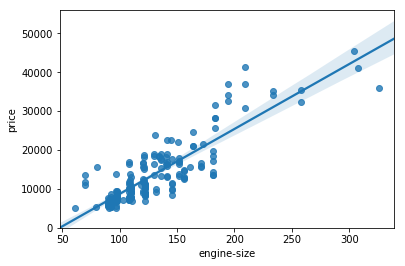

In [25]:
# Engine size as a potential predictor variable of price
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

* As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. 
* Engine size seems like a good predictor of price since the regression line is almost a perfect diagonal line, therefore, engine-size is a variable that we can use in a predictor model or using machine learning libraries

### 5.3 Predictive Analytics Example 2: finding correlation between city mpg and price
* We can do the same as above for gas mileage

In [26]:
df[['city-mpg','price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


(0, 48356.79119447158)

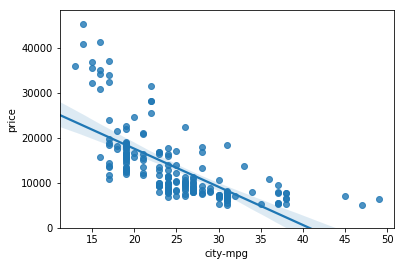

In [27]:
# plot
sns.regplot(x='city-mpg',y='price',data=df)
plt.ylim(0,)

* As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

### 5.4 Predictive Analytics Example 3: finding correlation between peak rpm and price
* Let's see if "Peak-rpm" as a predictor variable of "price":

In [28]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.037284
price,-0.037284,1.000000


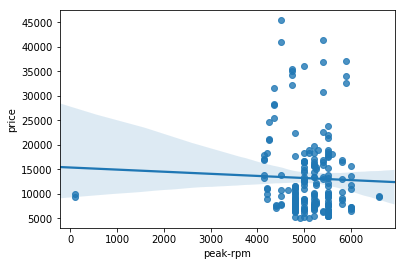

In [29]:
sns.regplot(x="peak-rpm", y="price", data=df)

* Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal, thus showing a weak correlation
* Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it is not a reliable variable.

### 5.5 Analyzing Categorical Variables using Visualization Example 1: Body Style
* Categorical Variables: Variables that desctibe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64"
* A good way to visualize categorical variables is by using boxplots.
* For example, we can use body-style and price

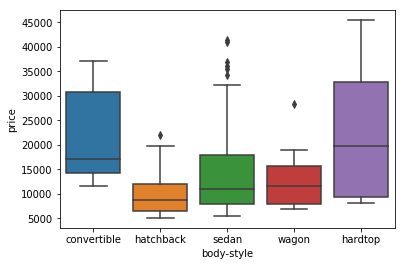

In [30]:
sns.boxplot(x="body-style", y="price", data=df)

* We can see that the distributions of price between the different body-style categories have significant overlap
* so body-style would not be a good predictor of price. 

### 5.6 Analyzing Categorical Variables using Visualization Example 2: Drive Wheel-Type
* Let's examine "drive wheels" and "price" :

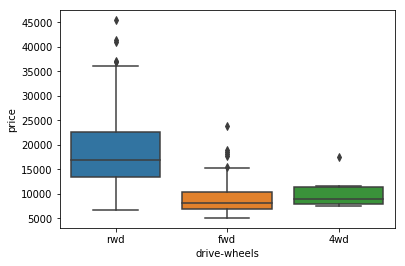

In [31]:
sns.boxplot(x="drive-wheels", y="price", data=df)

* Here we see that the distribution of price between the different drive wheel categories differs. As such, drive-wheels could potentially be a predictor of price.
* Let us see how much data we have of each type using the ```.value_counts()``` function:

In [32]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


# 6. Statistical Model Verification
## 6.1 P-value Estimate Example 1: Wheel-base vs. Price
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is:
- < 0.001 we say there is strong evidence that the correlation is significant,
- < 0.05; there is moderate evidence that the correlation is significant,
- < 0.1; there is weak evidence that the correlation is significant, and
- is >  0.1; there is no evidence that the correlation is significant.

In [33]:
# import stats module in scipy
from scipy import stats
done

'Done!'

In [34]:
## 6.2 Wheel-base vs Price

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


##### Conclusion: 
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

## 6.2 P-value Estimate Example 2: Width vs. Price
* calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [35]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

## 6.3 Model creation: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Variables:
- Width
- Engine-size
- Horsepower
- Highway-mpg
- Drive-wheels

Now to move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

# 7. Machine Learning Model Developement
## 7.1 Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:
- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable.

In [36]:
# import Regression tools from Machine Learning library SciKit-Learn
from sklearn.linear_model import LinearRegression

# create linear regression object
lm = LinearRegression()
done

'Done!'

In [37]:
# train the machine by inputting model variables
X = df[['city-mpg']]
Y = df['price']

# fit model
lm.fit(X,Y)
done

'Done!'

## 7.2 Predictive Modeling using trained Machine Learning Model & linear regression algorithm
* We now have a fully machine-trained linear-regression using the variable 'city-mpg' as a predictor for price!
* let us now predict some prices for cars from in the range 10-15mpg:

In [38]:
# let us predict prices using the machine learning model
Yhat=lm.predict(X)
Yhat[10:16] # stops at 15mpg, 16 is the end mark 

array([15058.17667835, 16757.08312743, 16757.08312743, 17606.53635197,
       21004.34925013, 21004.34925013])

As we can see, we have the following price predictions:
* 10mpg: 15058.18
* 11mpg: 16757.08
* 12mpg: 16757.08
* 13mpg: 17606.54
* 14mpg: 21004.35
* 15mpg: 21004.34  

We can also find the coefficient and the intercept of the regression model:

In [39]:
# Coefficient:
lm.coef_

array([-849.45322454])

In [40]:
# Intercept:
lm.intercept_

34595.60084277828

## 7.3 Predictive Modeling using trained Machine Learning Model & linear regression algorithm (Multiple Variables)

If we want to use more variables in our model to predict car price, we can use **Multiple Linear Regression**.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and *two or more* predictor (independent) variables.

 \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}


From the previous section  we know that other good predictors of price could be: 
* Width
* Engine-size
* Horsepower
* city-mpg
* Drive-wheels  

Let's develop a model using these variables as the predictor variables.

In [41]:
# Assign variables
Z = df[['engine-size', 'width', 'city-mpg']]
done

'Done!'

In [42]:
# train the machine-learning model
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# we can find the different coefficients (weights)
lm.coef_

array([ 120.79329472,  732.34033118, -189.3770389 ])

In [44]:
# find the intercept
lm.intercept_

-45603.46294543524

In [45]:
# now let us find the correlations
df[['engine-size', 'width', 'city-mpg']].corr()

,engine-size,width,city-mpg
engine-size,1.000000,0.729436,-0.650546
width,0.729436,1.000000,-0.633531
city-mpg,-0.650546,-0.633531,1.000000


## 7.4 Multiple Linear Regression Visualization

Multiple linear regressions are a bit more complicated because you can't visualise it with regression or residual plot. 

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

Fist, let's make a prediciton

In [46]:
Y_hat = lm.predict(Z)

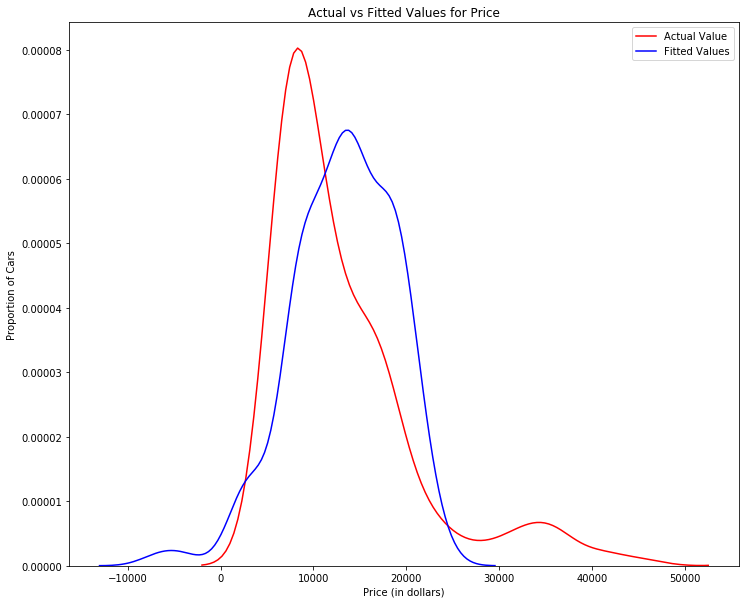

In [47]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

* We can see that the fitted values (blue) are reasonably close to the actual values (read), since the two distributions overlap a bit. 
* However, there is definitely some room for improvement.
* bear in mind, as more variables and data are added, more computing power is required, adding to the cost per prediction.

## 8. Conclusion
* A reasonable machine-trained multi-variable linear regression algotithm was used to predict used-car prices using data from the UC Irvine Machine Learning Repository. [Click to access](https://archive.ics.uci.edu/ml/datasets/Automobile)
* The model was created, modelled, tested, and statistically verified, given the following variables of the vehicle:
    * engine-size
    * width
    * city-mpg  

